In [31]:
%pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
from packaging import version
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [33]:
X, y = make_blobs(n_samples=2000, random_state=42)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

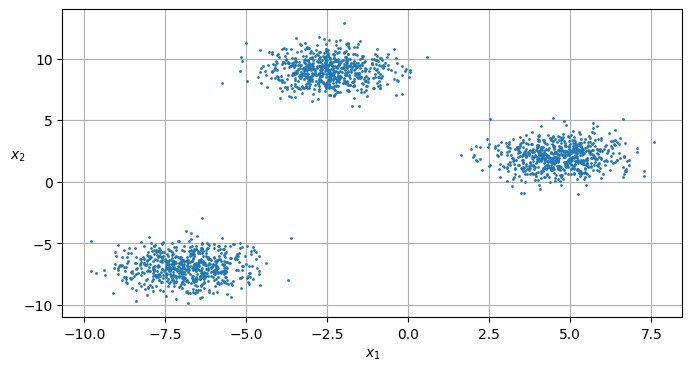

In [34]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [35]:
y_pred is kmeans.labels_

True

In [36]:
kmeans.cluster_centers_

array([[-2.47236981,  9.05024644],
       [-6.88074384, -6.90211374],
       [ 4.63302078,  2.04133635]])

In [37]:
kmeans.labels_

array([2, 2, 2, ..., 2, 1, 2], dtype=int32)

In [38]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [0, 1]])
kmeans.predict(X_new)

array([2, 2, 2], dtype=int32)

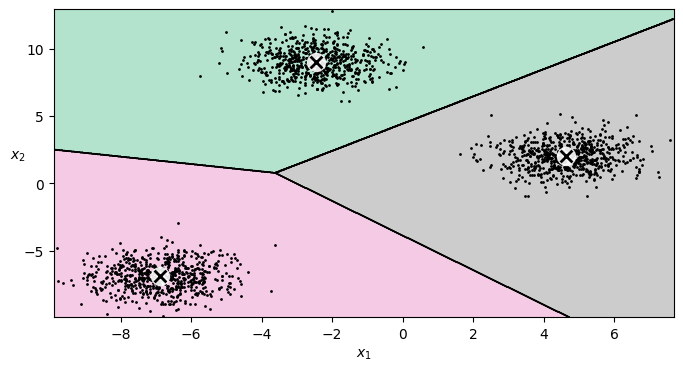

In [39]:
# extra code – this cell generates and saves Figure 9–3

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [40]:
kmeans.transform(X_new).round(2)

array([[ 7.47, 11.25,  4.63],
       [ 8.92, 13.3 ,  1.63],
       [ 8.42, 10.48,  4.75]])

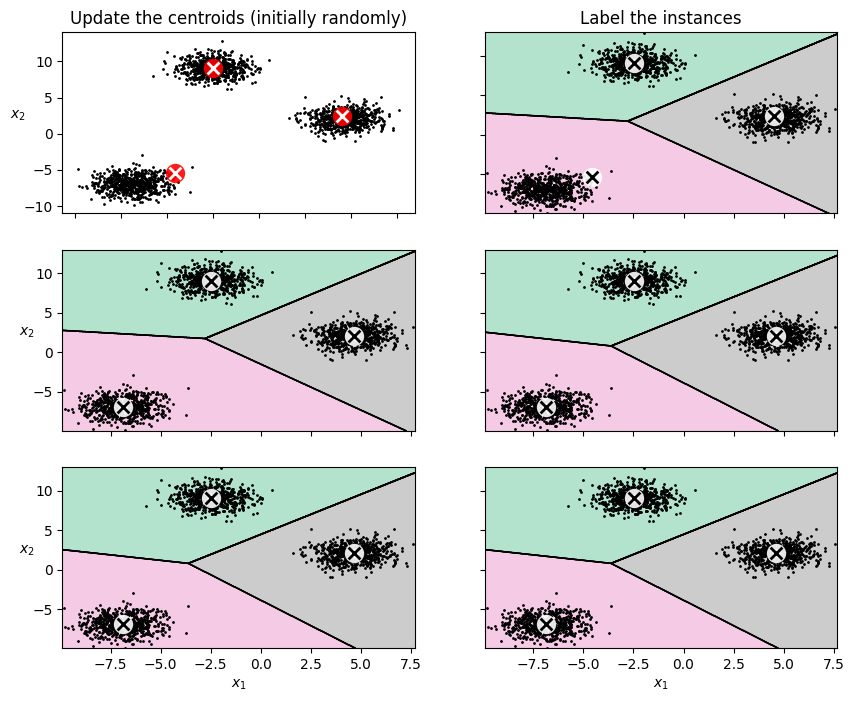

In [41]:
# extra code – this cell generates and saves Figure 9–4

kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=1,
                      random_state=42)
kmeans_iter2 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=2,
                      random_state=42)
kmeans_iter3 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=3,
                      random_state=42)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [42]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1]])
kmeans = KMeans(n_clusters=3, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1]]), n_clusters=3,
       n_init=1, random_state=42)

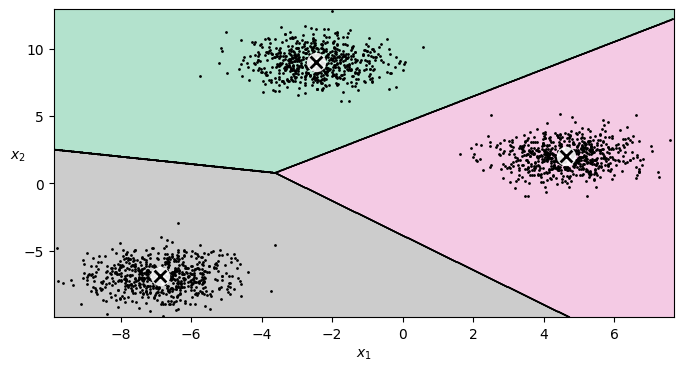

In [43]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

In [44]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=3, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=3, n_init=3, random_state=42)

100/100

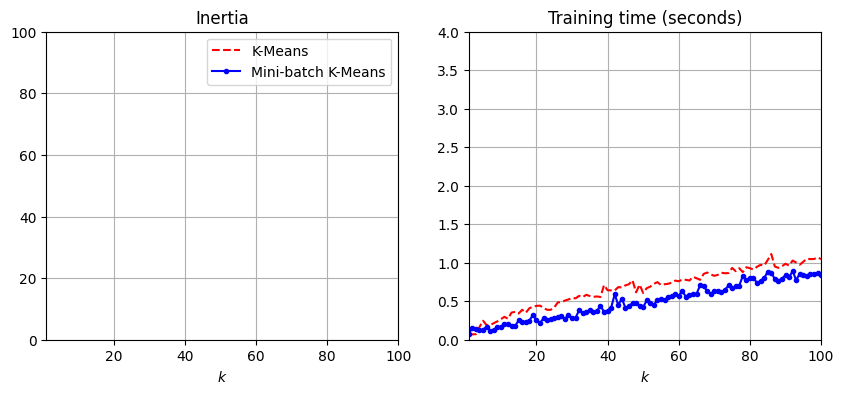

In [45]:
from timeit import timeit

max_k = 100
k=10
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

plt.show()

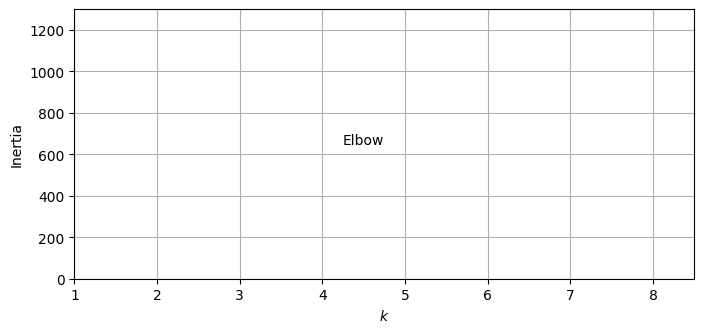

In [46]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 5)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 5), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

In [47]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

np.float64(0.8417142141078933)

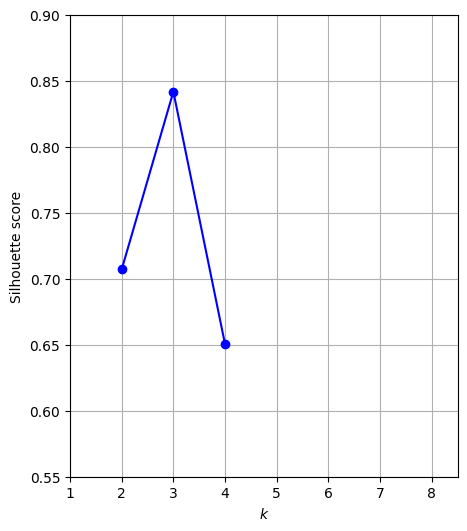

In [48]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(5, 6))
plt.plot(range(2, 5), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1, 8.5, 0.55, 0.9])
plt.grid()
plt.show()

In [49]:

from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [50]:
import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [51]:
import PIL
image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [52]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

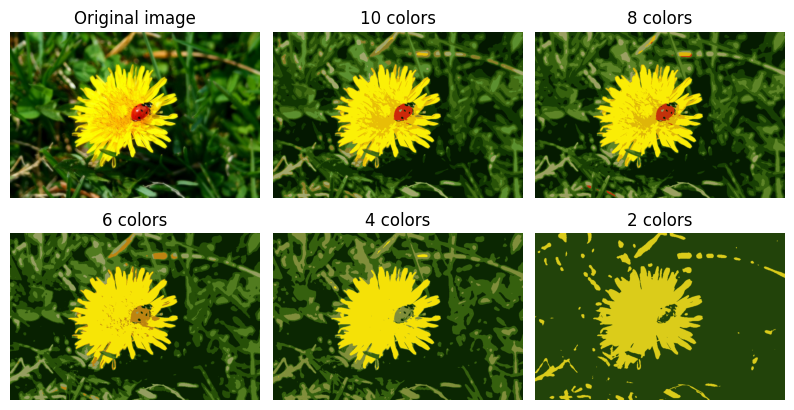

In [53]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

save_fig('image_segmentation_plot', tight_layout=False)
plt.show()

In [54]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [55]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [56]:

log_reg.score(X_test, y_test)

0.7581863979848866

In [57]:
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

In [58]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

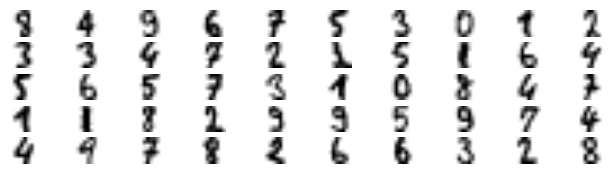

In [59]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_plot", tight_layout=False)
plt.show()

In [60]:
y_representative_digits = np.array([
    8, 4, 9, 6, 7, 5, 3, 0, 1, 2,
    3, 3, 4, 7, 2, 1, 5, 1, 6, 4,
    5, 6, 5, 7, 3, 1, 0, 8, 4, 7,
    1, 1, 8, 1, 9, 9, 5, 9, 7, 4,
    4, 9, 7, 8, 2, 6, 6, 3, 2, 8
])

In [61]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [62]:
dbscan.labels_

array([ 0,  1,  1,  0, -1,  1,  2, -1,  3,  4,  5,  8,  8,  3,  1, 10,  4,
        6,  4,  5,  3,  3, -1,  0,  2,  7,  1,  6,  3,  2,  0,  0,  1,  1,
        8, -1,  9,  4, -1,  0,  1, -1,  1,  1,  0,  3,  5,  2,  1,  4,  3,
        2, -1,  3,  0,  5,  4,  0,  2,  0,  6,  5,  1,  1,  5,  1,  9,  1,
        3, -1,  8,  8,  0, -1,  0,  5,  1,  8,  4, -1,  9,  6,  3,  8,  9,
        9,  4,  3,  4,  1,  4,  4,  9,  4,  0,  1,  0,  4,  0,  6,  1,  8,
        6,  6,  5,  6,  0,  0,  3, -1, -1,  4,  1,  0,  0,  0,  5,  1,  8,
        3,  4,  1,  0,  2,  0,  3, -1,  1,  3,  0,  9,  3,  3,  7, -1,  1,
        0,  5,  1,  6,  0,  5,  6,  2,  8,  3,  3,  0,  0,  7,  4,  4,  9,
        1,  7,  7, -1,  1,  8,  9,  6,  1,  5,  3, -1,  1,  5,  4,  0,  1,
        0,  4,  8,  0,  6,  8,  0,  4,  9,  3,  0,  6,  7,  3,  7,  3,  0,
        4,  3,  0, -1,  2,  5,  2,  0,  0,  8,  4,  4,  4,  3,  0,  5,  5,
        8,  8,  1,  3,  1,  3,  1,  3,  3,  2,  7, -1,  3, -1,  4,  8,  3,
        2,  7,  0, -1,  3

In [63]:
dbscan.core_sample_indices_

array([  0,   2,   3,   5,   6,   8,   9,  10,  13,  14,  16,  17,  18,
        20,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  36,
        37,  39,  40,  42,  43,  44,  45,  46,  47,  49,  51,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  70,  71,  74,  75,  76,  77,  78,  80,  81,  82,  83,  84,
        85,  87,  89,  90,  91,  92,  94,  95,  96,  97,  98,  99, 101,
       102, 103, 104, 105, 106, 108, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 121, 122, 123, 124, 125, 127, 128, 129, 131, 132, 133,
       135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       150, 151, 153, 154, 155, 157, 158, 160, 161, 163, 165, 166, 167,
       168, 169, 171, 172, 173, 175, 177, 178, 179, 180, 181, 182, 184,
       185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198,
       200, 202, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 216,
       218, 219, 220, 221, 222, 223, 225, 226, 228, 229, 230, 23

In [64]:
dbscan.components_

array([[ 1.83676456, -0.00303771],
       [ 0.87691838,  0.42791463],
       [ 1.65347364, -0.19141184],
       ...,
       [ 1.92914169,  0.07561888],
       [ 0.95873921, -0.48302937],
       [ 0.03246504,  0.29951561]])

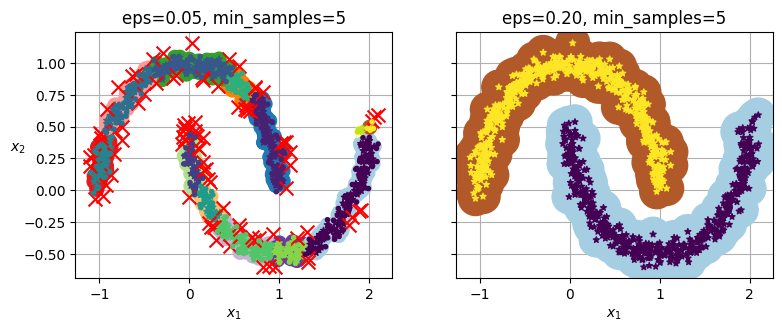

In [65]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(
        cores[:, 0],
        cores[:, 1],
        c=dbscan.labels_[core_mask],
        marker="o",
        s=size,
        cmap="Paired",
    )
    plt.scatter(cores[:, 0], cores[:, 1], marker="*", s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(
        non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker="."
    )
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)


dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [70]:
dbscan = dbscan2

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [72]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)
knn.predict_proba(X_new)

array([[0.2 , 0.8 ],
       [1.  , 0.  ],
       [0.18, 0.82],
       [1.  , 0.  ]])

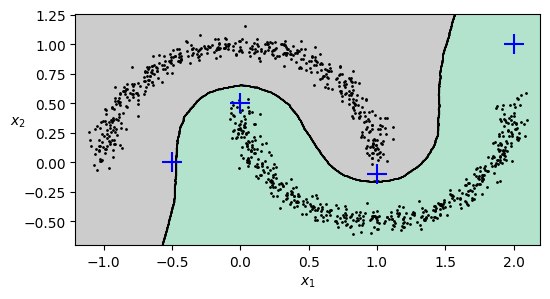

In [73]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()